## Equation Solving
### Importing modules:

In [11]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

### Linear Equation Systems:

In general, a linear equation system can be written on the form:

\begin{gather*}
\Large a_{11}x_{1}  + a_{12}x_{2} + ... + a_{1n}x_{n} = b_{1}, \\
\Large a_{21}x_{1}  + a_{22}x_{2} + ... + a_{2n}x_{n} = b_{2}, \\
\newline
\Large a_{m1}x_{1}  + a_{m2}x_{2} + ... + a_{mn}x_{n} = b_{m}
\end{gather*}

### Square Systems:

\begin{gather*}
\Large \frac{ \| \delta x\| }{\|x\|}=\frac{\|A^{-1} \delta b \|}{\|x\|} \leq  \frac{\|A^{-1}\| . \| \delta b\|}{\|x\|}= \frac{\|A^{-1}\| . \|b\|}{\|x\|}. \frac{\|\delta b\|}{\|b\|}  \leq \|A^{-1}\| . \|A\| .  \frac{\|\delta b\|}{\|b\|}
\end{gather*}

#### Example:

\begin{gather*}
\Large 2x_{1} + 3x_{2} = 4 \\
\Large 5x_{1} + 4x_{2} = 3
\end{gather*}

In [12]:
# Using SymPy
A = sympy.Matrix([
    [2, 3],
    [5, 4]
])
b = sympy.Matrix([4, 3])

print(f"Rank of A: {A.rank()}")
print(f"Condition number of A: {A.condition_number()}")
print(f"Norm of A: {A.norm()}")

Rank of A: 2
Condition number of A: sqrt(2*sqrt(170) + 27)/sqrt(27 - 2*sqrt(170))
Norm of A: 3*sqrt(6)


In [13]:
# Using Numpy/SciPy
A = np.array([
    [2, 3],
    [5, 4]
])
b = np.array([4, 3])

print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Condition number of A: {np.linalg.cond(A)}")
print(f"Norm of A: {np.linalg.norm(A)}")

Rank of A: 2
Condition number of A: 7.582401374401516
Norm of A: 7.3484692283495345


### LU factorization 
#### In SymPy:

In [14]:
A = sympy.Matrix([
    [2, 3],
    [5, 4]
])
b = sympy.Matrix([4, 3])

L, U, _ = A.LUdecomposition()
print(f"L: {L}")
print(f"U: {U}")
print(f"L * U: {L * U}")

x = A.solve(b)  # equivalent to A.LUsolve(b)
print(f"x: {x}")

L: Matrix([[1, 0], [5/2, 1]])
U: Matrix([[2, 3], [0, -7/2]])
L * U: Matrix([[2, 3], [5, 4]])
x: Matrix([[-1], [2]])


In [15]:
A = np.array([
    [2, 3],
    [5, 4]
])
b = np.array([4, 3])

P, L, U = la.lu(A)
print(f"L: \n{L}\n")
print(f"U: \n{U}\n")
print(f"P.dot(L.dot(U)): \n{P.dot(L.dot(U))}\n")
x = la.solve(A, b)
print(f"x: {x}")

L: 
[[1.  0. ]
 [0.4 1. ]]

U: 
[[5.  4. ]
 [0.  1.4]]

P.dot(L.dot(U)): 
[[2. 3.]
 [5. 4.]]

x: [-1.  2.]


### Rectangular Systems:

In [16]:
# defining true model
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x ** 2

In [17]:
# simulate noisy data
m = 100
X = 1 - 2 * np.random.randn(m)
Y = a + b * X  + c * x ** 2 + np.random.randn(m)

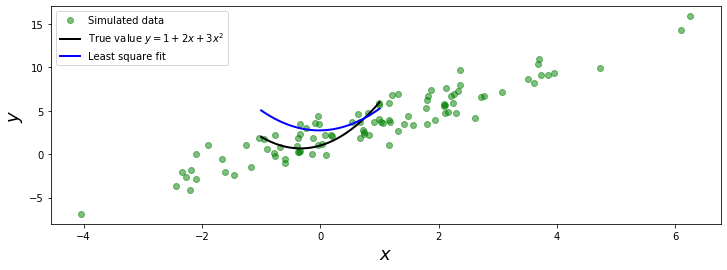

In [18]:
# fit the data to the model using linear least squares
A = np.vstack([X**0, x**1, x**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

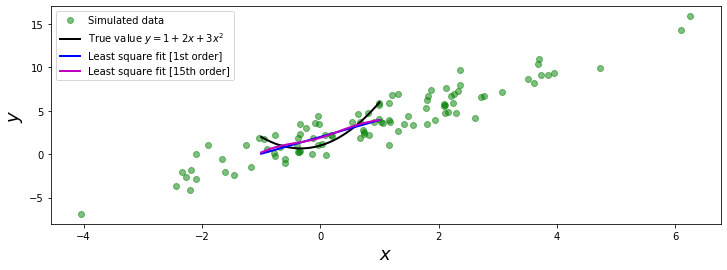

In [19]:
# fit the data to the model using linear least square:
# first order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r , rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

### EigenValue Problems:

In [21]:
# Example_01
A = np.array([
    [1, 3, 5],
    [3, 5, 3],
    [5, 3, 9]
])
e_vals, e_vecs = la.eig(A)
print(f"e_vals: {e_vals}\n")
print(f"e_vecs: \n{e_vecs}\n")
print(f"la.eigvalsh: {la.eigvalsh(A)}")

e_vals: [13.35310908+0.j -1.75902942+0.j  3.40592034+0.j]

e_vecs: 
[[ 0.42663918  0.90353276 -0.04009445]
 [ 0.43751227 -0.24498225 -0.8651975 ]
 [ 0.79155671 -0.35158534  0.49982569]]

la.eigvalsh: [-1.75902942  3.40592034 13.35310908]


### Non-Linear Equations: